In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [236]:
df_real = pd.read_csv('./motifs.csv')
df_app = pd.read_csv('./motifs_app.csv')

In [237]:
df_real.head()

,exam_id,lead,motif_3_0,motif_3_1,motif_3_2,motif_3_3,motif_4_0,motif_4_1,motif_4_2,motif_4_3,...,motif_5_29,motif_5_30,motif_5_31,motif_5_32,motif_5_33,duration_motif_3,duration_motif_4,duration_motif_5,array_p_4,array_p_5
0,exame 100,lead 0,NaN,NaN,6888082,180755,NaN,NaN,NaN,NaN,...,209723810,55085592,72383179,36992523,590450,3.84886,798.487468,128624.769303,"[0, 0, 0, 0]","[0, 0, 0, 0, 0]"


In [238]:
df_real.drop(columns=["motif_3_2", "motif_3_3"], inplace= True)
df_app.drop(columns=["motif_3_2", "motif_3_3"], inplace= True)
df_real.dropna(axis=1, how='all', inplace=True)
df_app.dropna(axis=1, how='all', inplace=True)
df_count_motifs_real = df_real.drop(columns=["exam_id", 'lead'])
df_count_motifs_app = df_app.drop(columns=["exam_id", 'lead'])


In [239]:
df_real.head()

,exam_id,lead,motif_4_4,motif_4_6,motif_4_7,motif_4_8,motif_4_9,motif_4_10,motif_5_11,motif_5_13,...,motif_5_29,motif_5_30,motif_5_31,motif_5_32,motif_5_33,duration_motif_3,duration_motif_4,duration_motif_5,array_p_4,array_p_5
0,exame 100,lead 0,1191348017,29760333,24170363,33477284,22113113,402937,168818069658,3808162412,...,209723810,55085592,72383179,36992523,590450,3.84886,798.487468,128624.769303,"[0, 0, 0, 0]","[0, 0, 0, 0, 0]"


In [240]:
df_app.head(10)

,exam_id,lead,motif_4_4,motif_4_6,motif_4_7,motif_4_8,motif_4_9,motif_4_10,motif_5_11,motif_5_13,...,motif_5_29,motif_5_30,motif_5_31,motif_5_32,motif_5_33,duration_motif_3,duration_motif_4,duration_motif_5,array_p_4,array_p_5
0,exame 100,lead 0,35922681,1263808,599714,421660,216953,6652,22864562,5284310,...,6838,12107,1940,2187,679,3.840622,22.755012,19.888355,"[0.3, 0.3, 0.3, 0.3]","[0.3, 0.3, 0.3, 0.3, 0.3]"
1,exame 100,lead 0,105257737,3981981,1891124,1359392,767444,23206,57127007,14774781,...,26919,24116,12503,5076,1222,3.839290,66.442606,51.682878,"[0.05, 0.1, 0.15, 0.2]","[0.05, 0.1, 0.15, 0.2, 0.25]"
2,exame 100,lead 0,121324306,5057671,2356363,1645387,1018479,30025,132970271,31580310,...,43058,40376,9873,6699,1733,3.855057,76.610547,114.020352,"[0.2, 0.15, 0.1, 0.05]","[0.25, 0.2, 0.15, 0.1, 0.05]"
3,exame 100,lead 0,94056751,3433553,1619975,1178766,685724,19326,46372336,12471132,...,19990,20501,4339,3374,962,3.843420,59.522660,42.544039,"[0, 0.1, 0.18, 0.24]","[0, 0.1, 0.18, 0.24, 0.3]"
4,exame 100,lead 0,118571159,4909013,2293941,1640987,923150,31476,124893308,25042376,...,73651,57032,9785,9296,2385,3.845361,72.349544,100.520025,"[0.24, 0.18, 0.1, 0]","[0.3, 0.24, 0.18, 0.1, 0]"
5,exame 100,lead 0,64069745,2525603,1245760,865324,551582,16565,148001409,27879464,...,54682,47035,15290,8718,1524,3.938719,40.385519,118.976923,"[0.5, 0.25, 0.12, 0.06]","[0.5, 0.25, 0.12, 0.06, 0.03]"
6,exame 100,lead 0,43653360,1626797,742301,528585,263490,7947,30875825,7890776,...,16709,14912,2683,2456,619,3.841885,28.388449,28.720295,"[0.06, 0.12, 0.25, 0.5]","[0.03, 0.06, 0.12, 0.25, 0.5]"
7,exame 100,lead 0,136287264,5482795,2675774,1795533,1010863,32239,145517161,36506748,...,72550,65083,32282,12255,2521,3.875398,86.295634,128.851249,"[0.1,0.1,0.1,0.1]","[0.1,0.1,0.1,0.1,0.1]"
8,exame 100,lead 0,201677036,8423547,4206622,3084489,1672557,58299,369264311,76233497,...,155088,133943,23957,19400,5053,3.877803,127.561494,305.311508,"[0.05, 0.05, 0.05, 0.05]","[0.05, 0.05, 0.05, 0.05, 0.05]"
9,exame 100,lead 0,150886111,6155104,2897902,2087077,1112604,37638,165893231,40415635,...,89683,74282,44325,13850,2858,3.863117,95.904094,146.594979,"[0, 0.1, 0.1, 0.1]","[0, 0.1, 0.1, 0.1, 0.1]"


In [241]:
num_tests = df_app.shape[0]

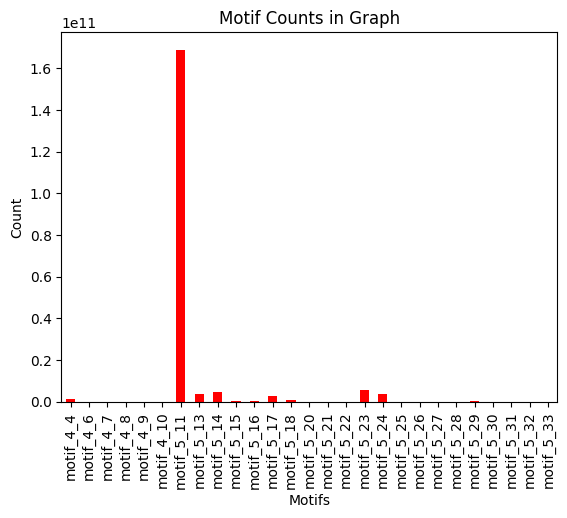

In [242]:
df_real.loc[0].iloc[2:29].plot(kind='bar', color='red')
plt.title('Motif Counts in Graph')
plt.xlabel('Motifs')
plt.ylabel('Count')
plt.show()

In [243]:
def plot_stacked_bars(series1, series2, title='Motif Counts Comparison', xlabel='Motifs', ylabel='Count'):
    # Combine the two series into a DataFrame
    df = pd.DataFrame({'Real': series1, 'Appr.': series2})

    # Plotting the stacked bars
    df.plot(kind='bar', stacked=True, colormap='viridis')
    
    # Customize the plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

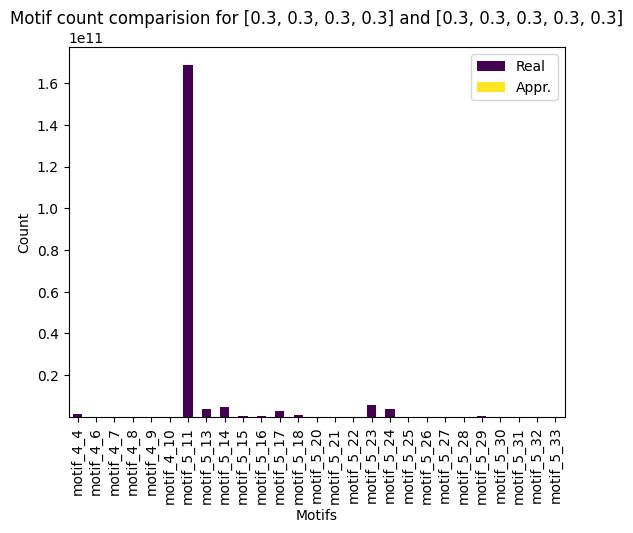

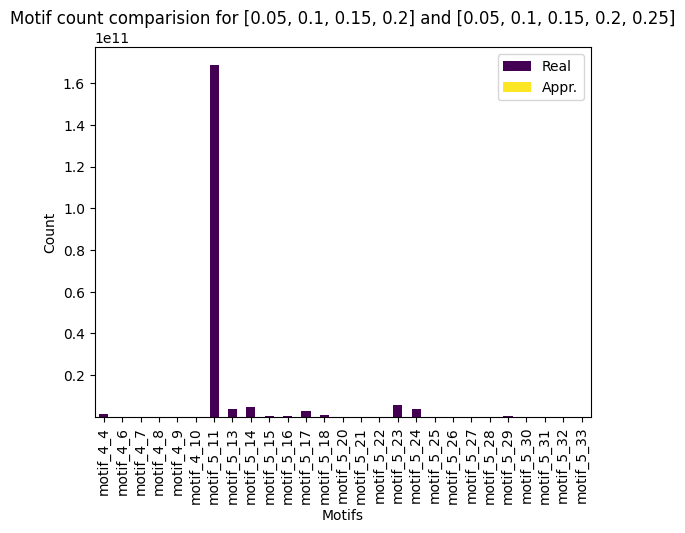

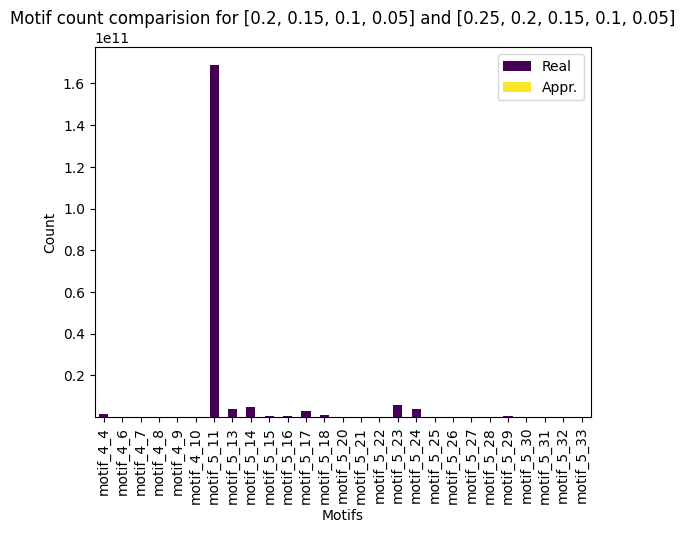

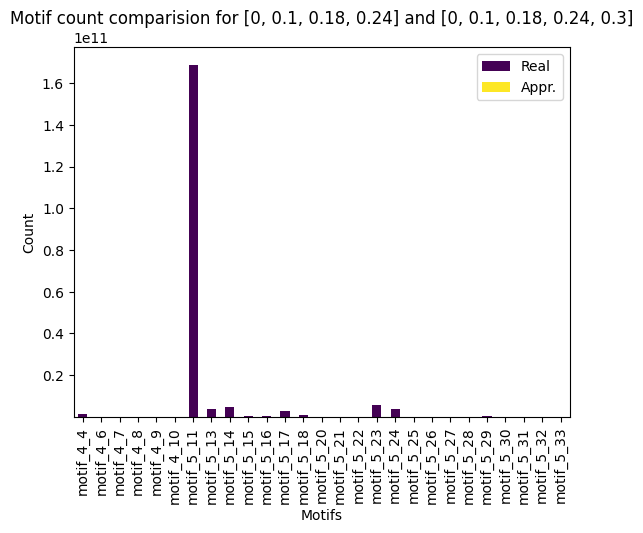

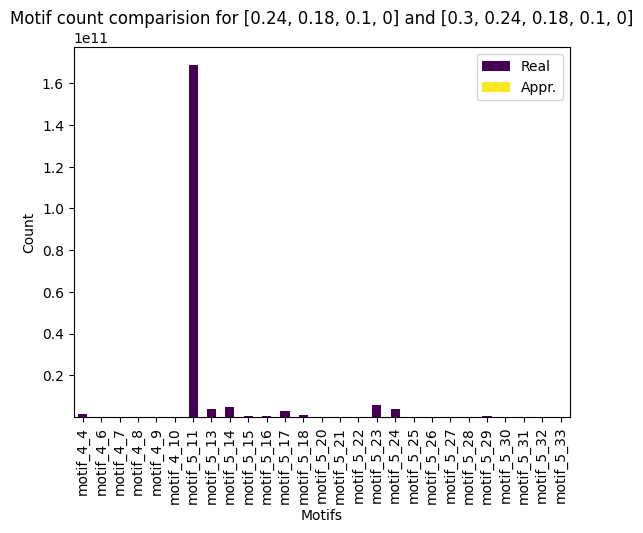

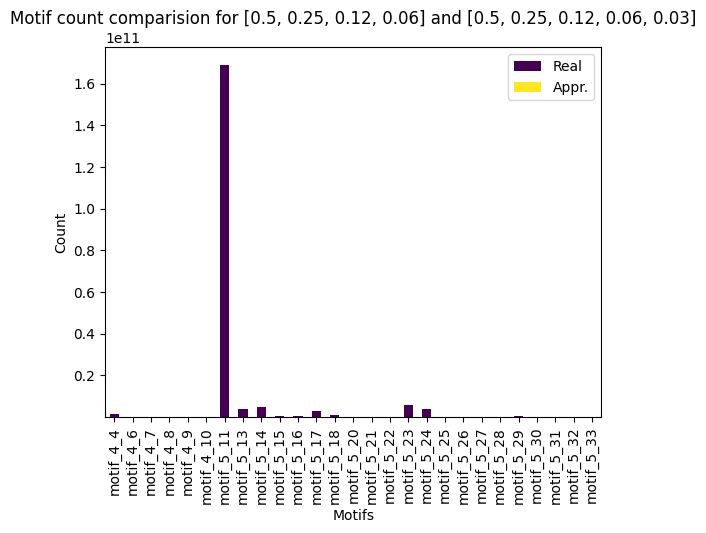

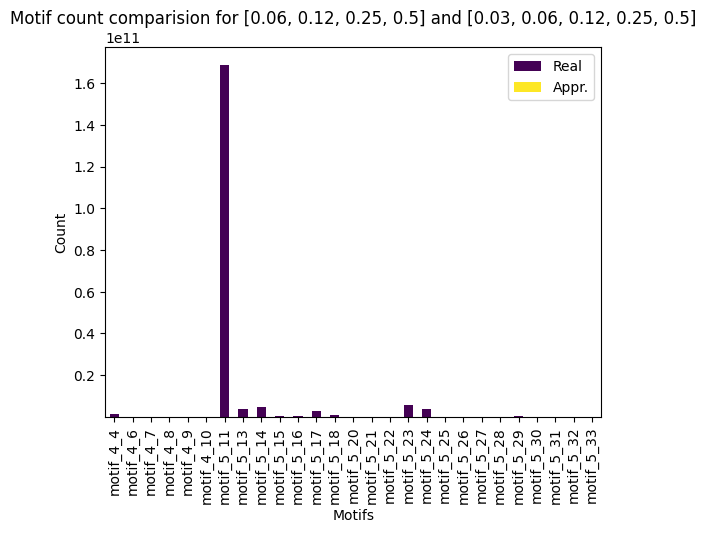

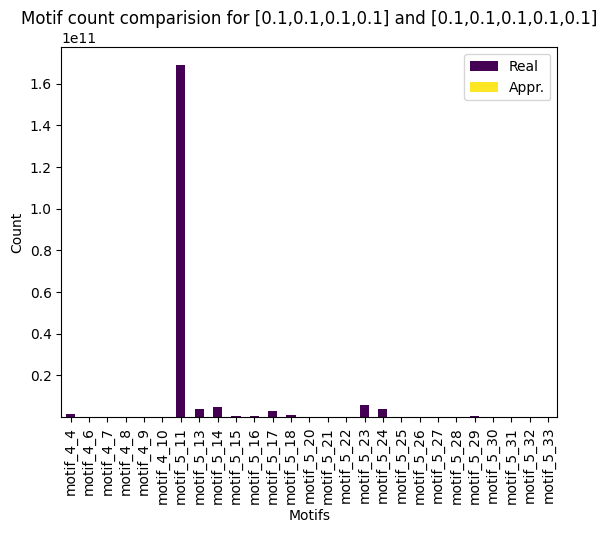

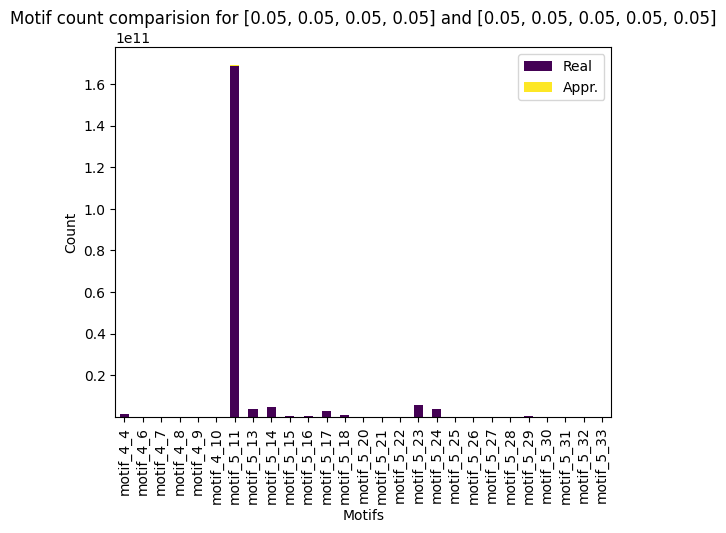

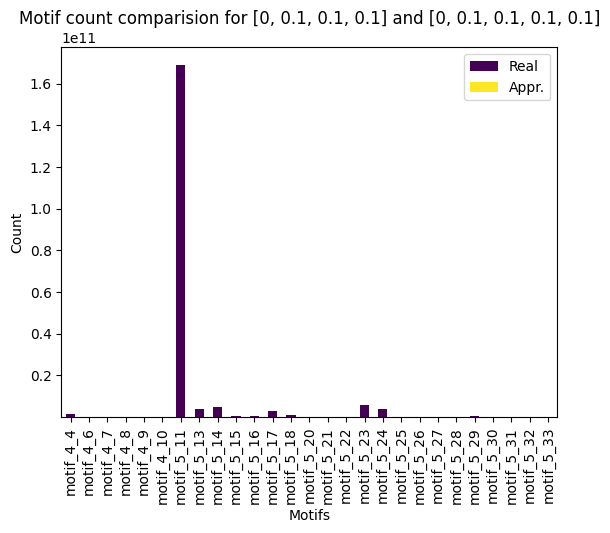

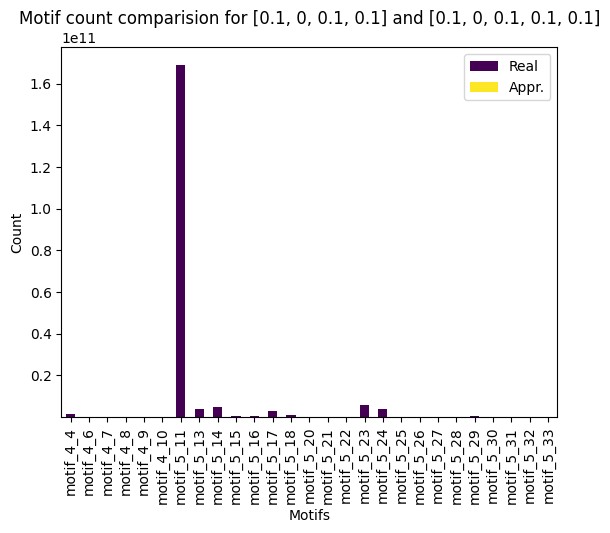

In [244]:
for i in range(0, num_tests):
    plot_stacked_bars(df_real.iloc[0,2:29], df_app.iloc[i,2:29], title=f"Motif count comparision for {df_app.loc[i,'array_p_4']} and {df_app.loc[i,'array_p_5']}")

In [245]:

def plot_ratio_bars(series1, series2, title='Ratio of Series2 to Series1', xlabel='Motifs', ylabel='Ratio'):
    # Combine the two series into a DataFrame
    df = pd.DataFrame({'Series1': series1, 'Series2': series2})

    # Calculate the ratio Series2/Series1
    ratio_series = series2 / series1

    # Plotting the ratio bars
    ratio_series.plot(kind='bar', color='green', alpha=0.7)
    
    # Customize the plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

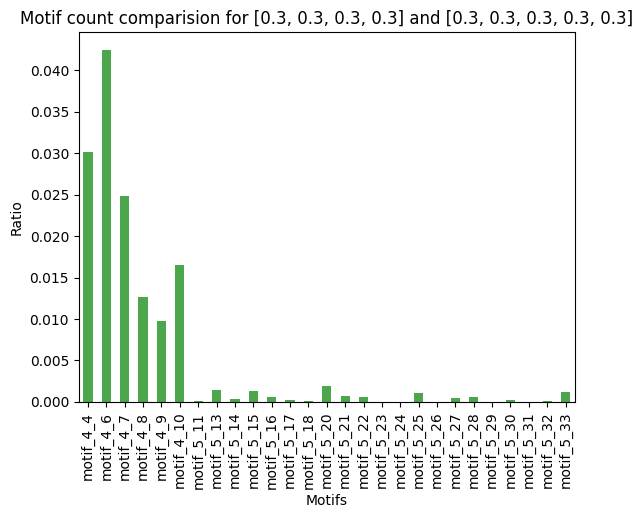

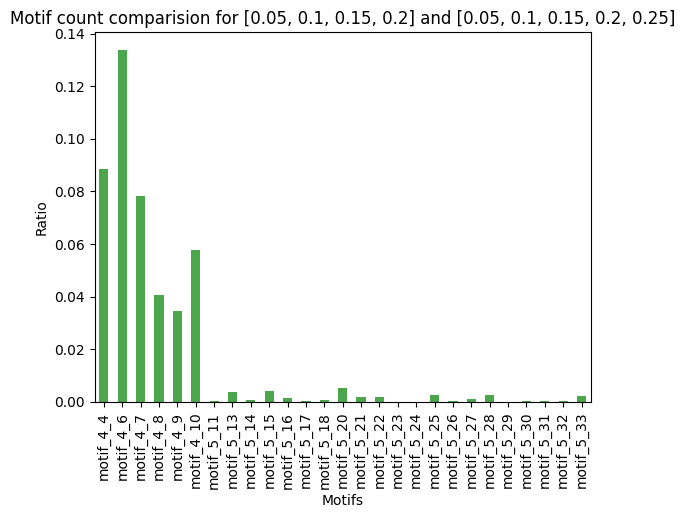

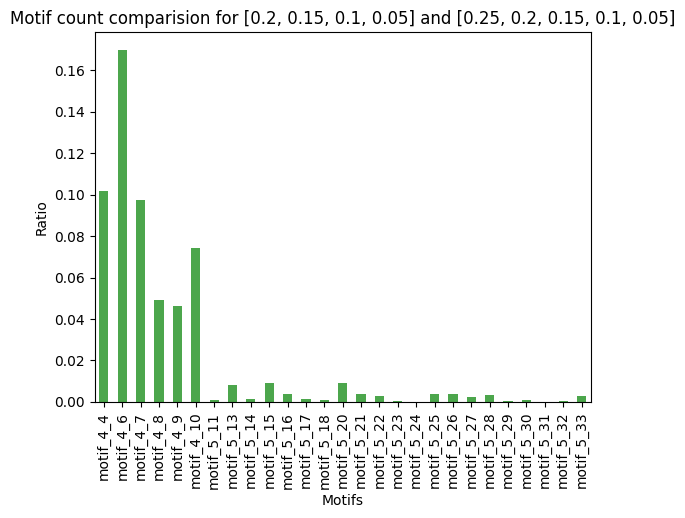

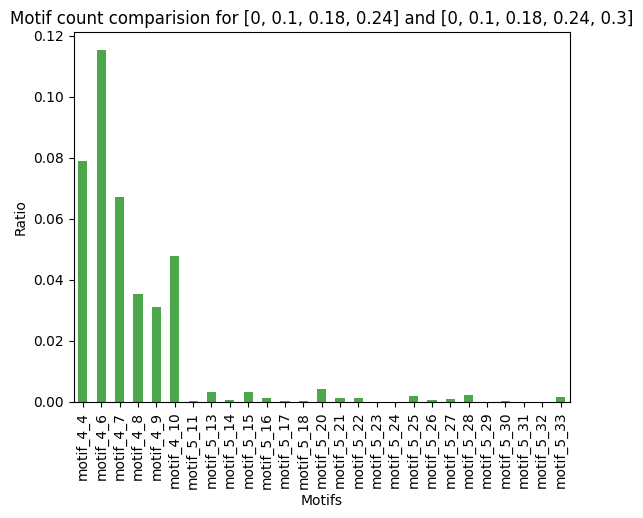

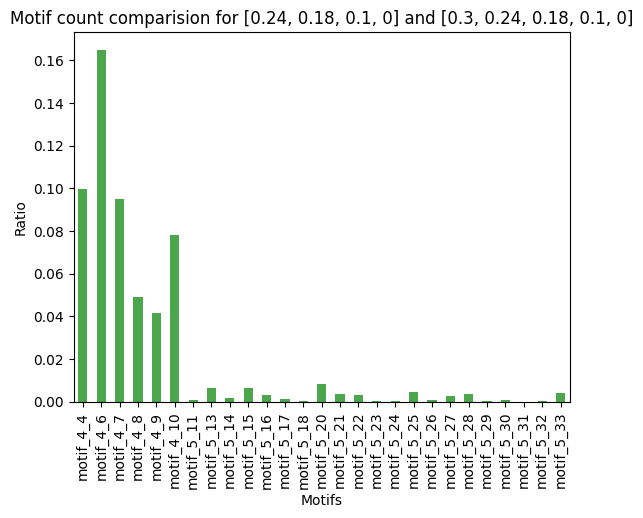

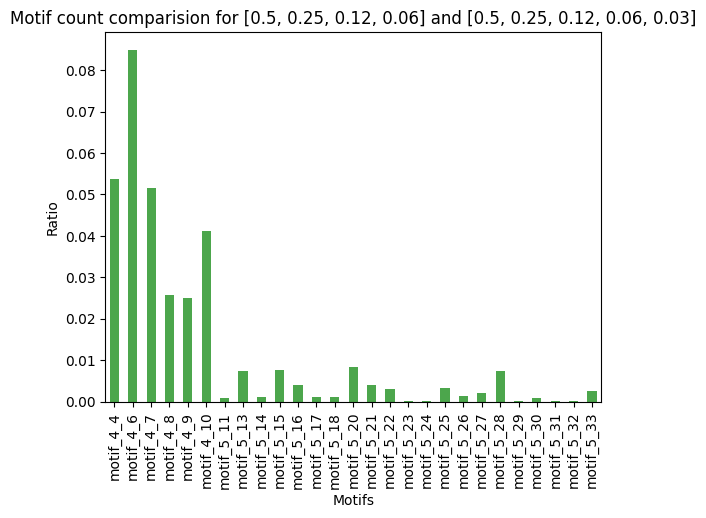

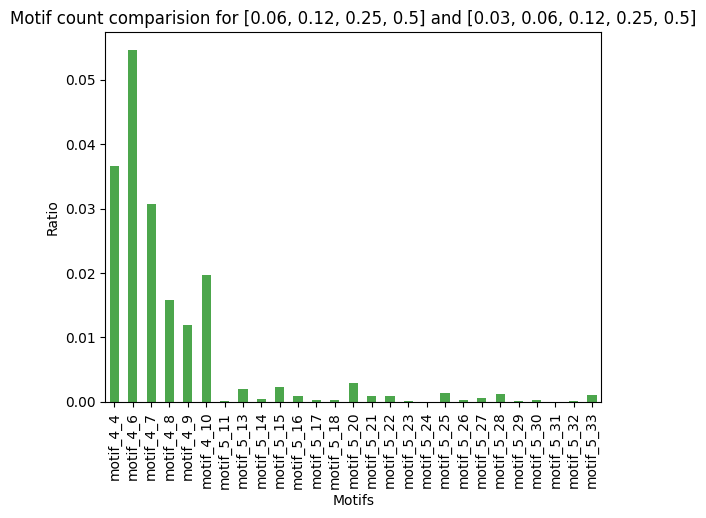

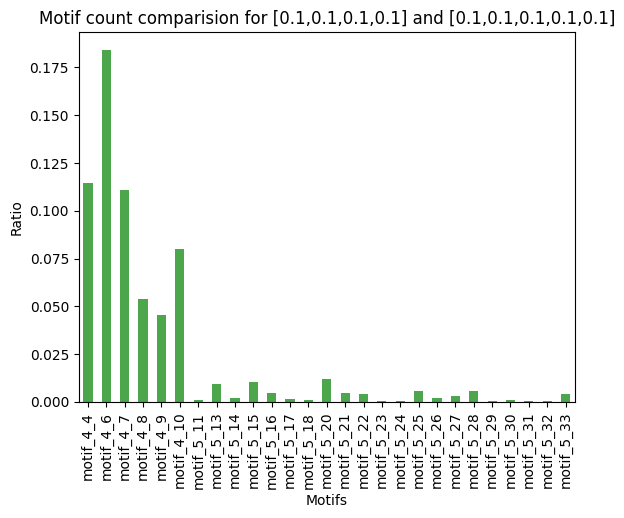

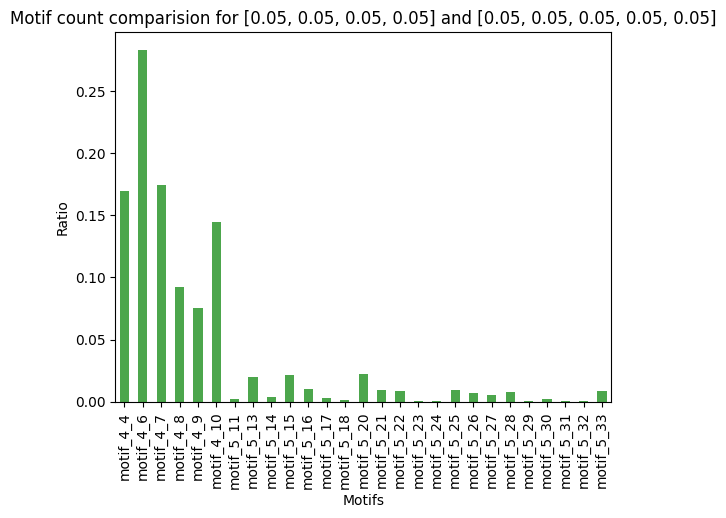

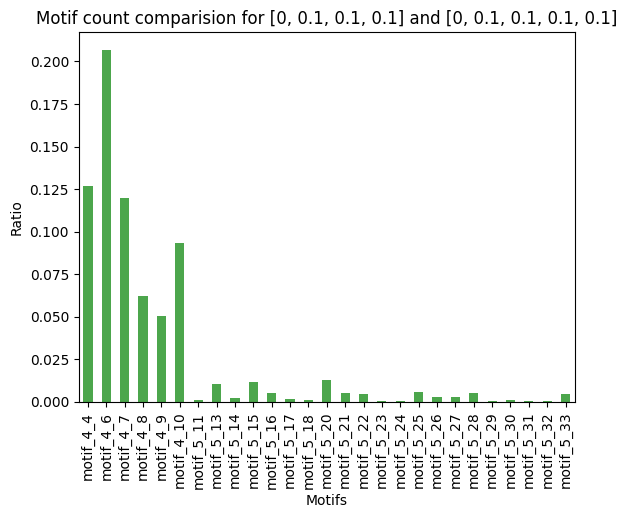

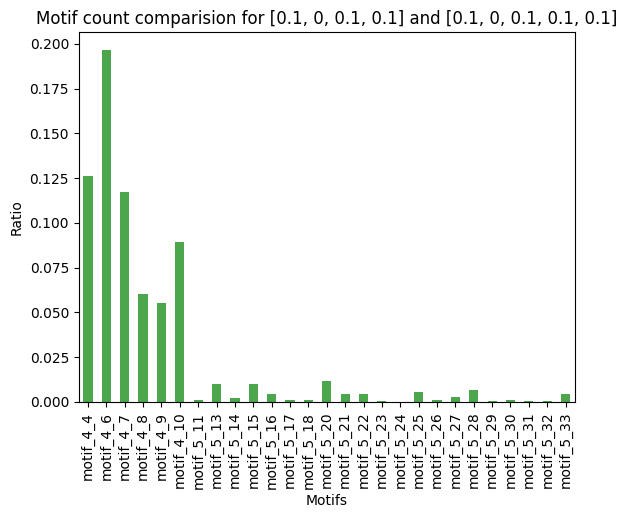

In [246]:
for i in range(0, num_tests):
    plot_ratio_bars(df_real.iloc[0,2:29], df_app.iloc[i,2:29], title=f"Motif count comparision for {df_app.loc[i,'array_p_4']} and {df_app.loc[i,'array_p_5']}")

In [247]:
df_app.loc[0,['duration_motif_4', 'duration_motif_5']]

duration_motif_4    22.755012
duration_motif_5    19.888355
Name: 0, dtype: object

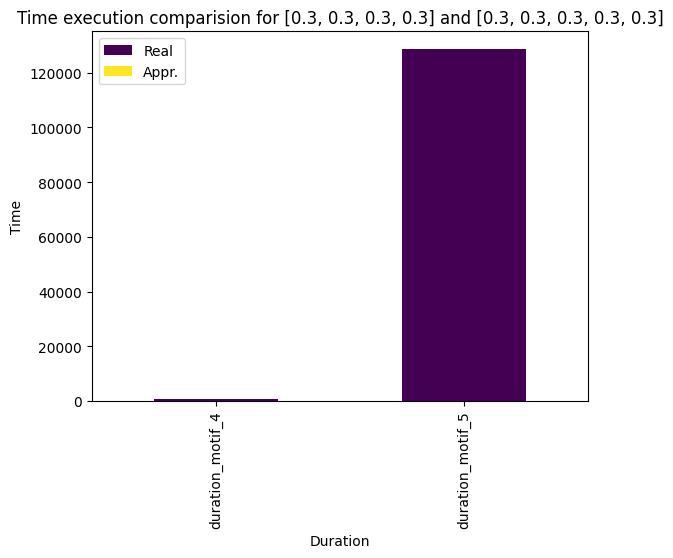

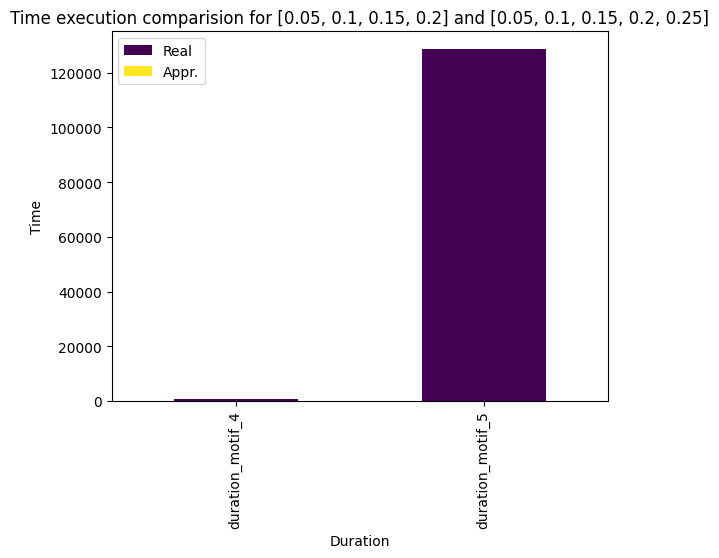

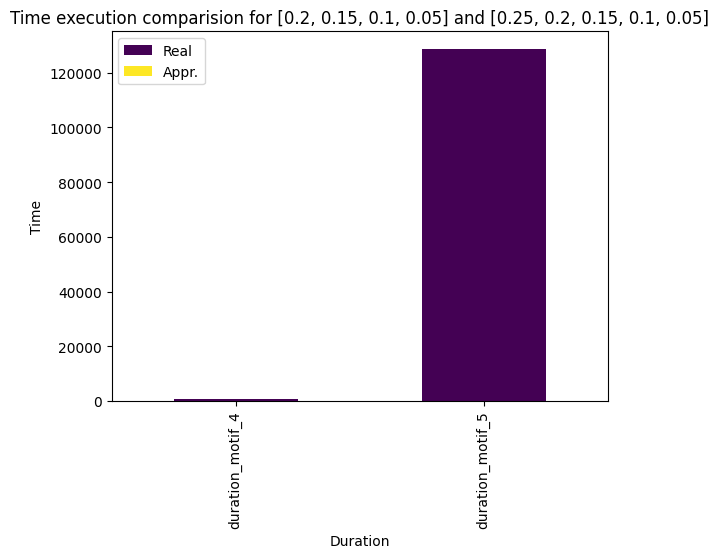

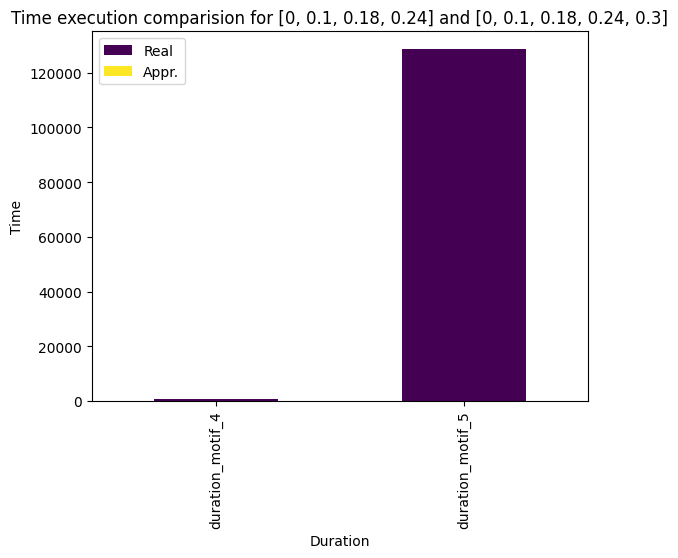

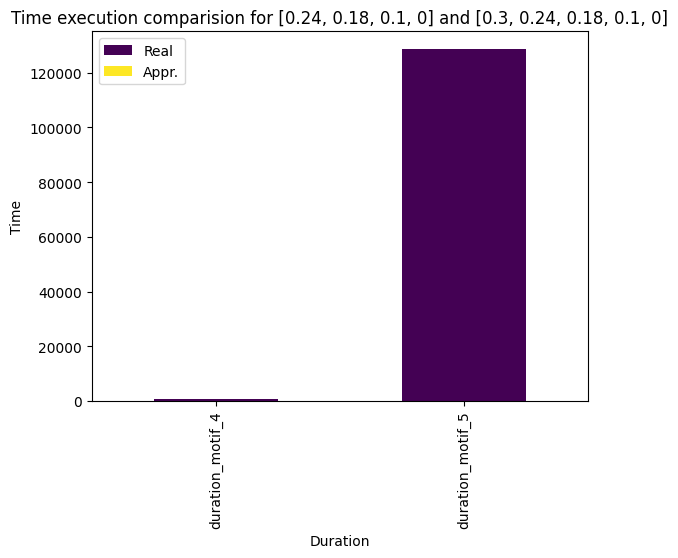

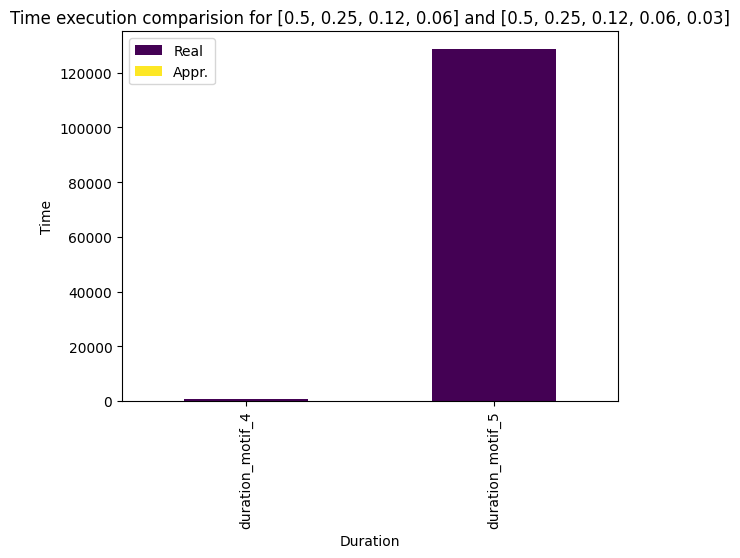

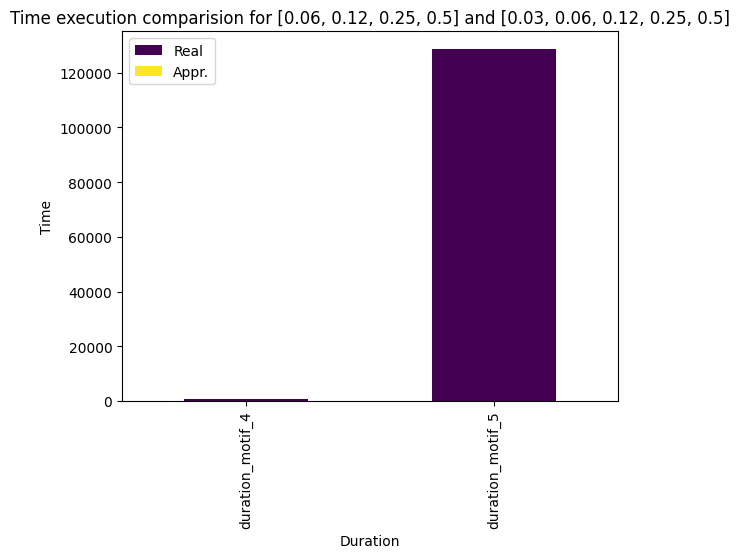

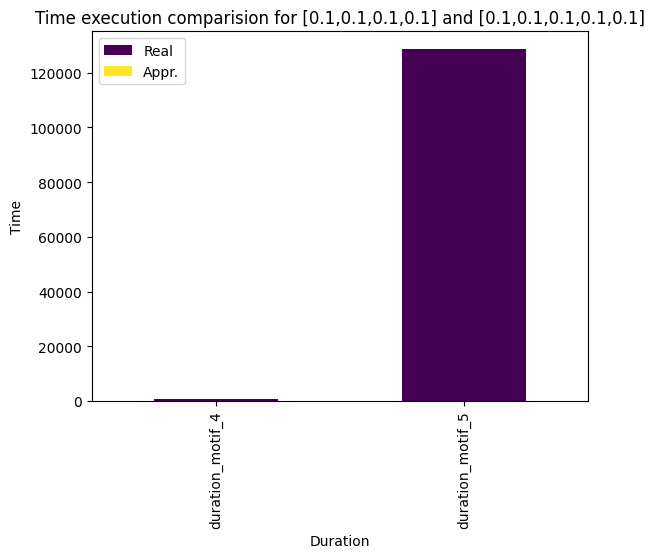

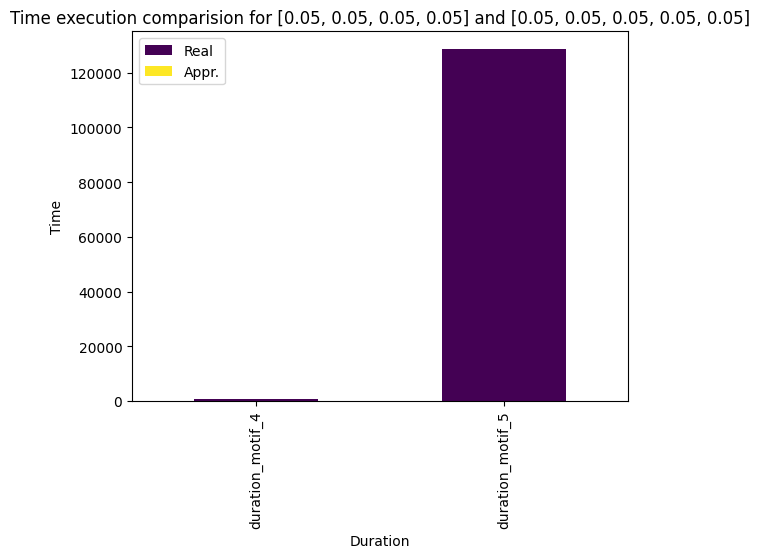

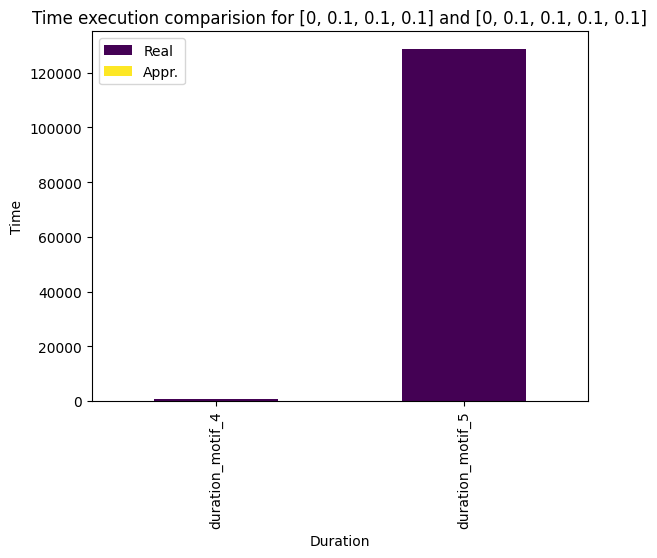

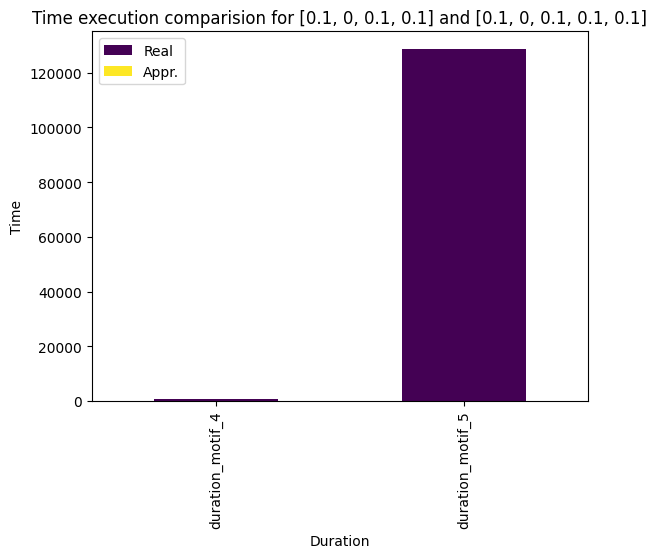

In [248]:
for i in range(0, num_tests):
    plot_stacked_bars(df_real.loc[0,['duration_motif_4', 'duration_motif_5']], df_app.loc[0,['duration_motif_4', 'duration_motif_5']], title=f"Time execution comparision for {df_app.loc[i,'array_p_4']} and {df_app.loc[i,'array_p_5']}", xlabel='Duration', ylabel='Time')

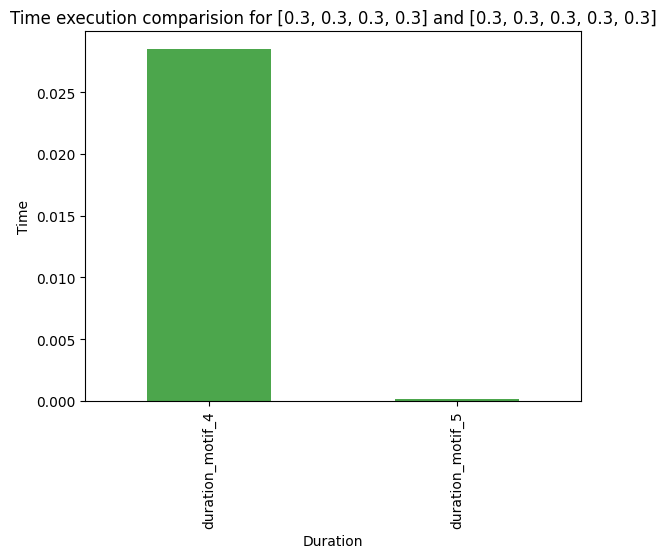

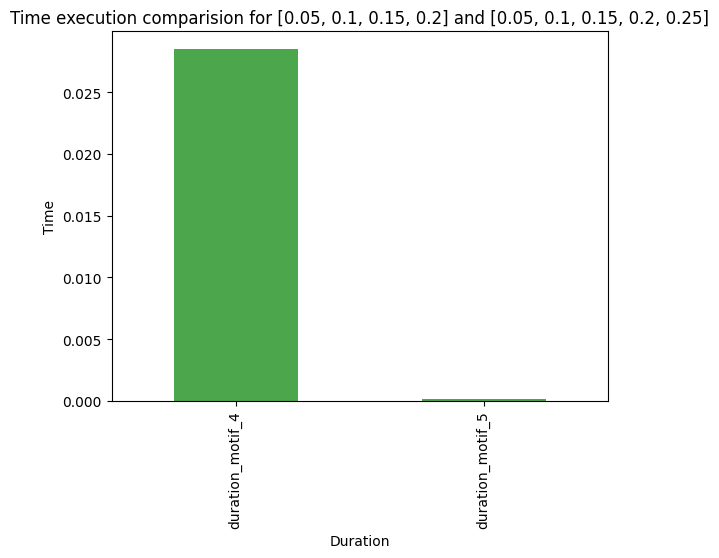

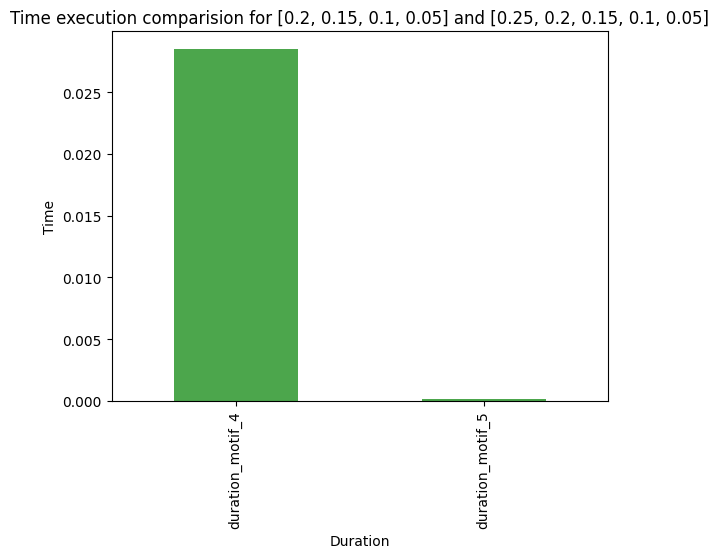

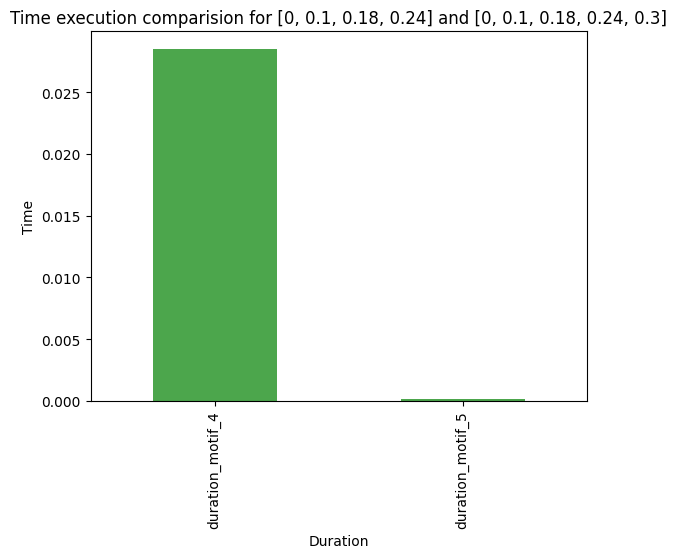

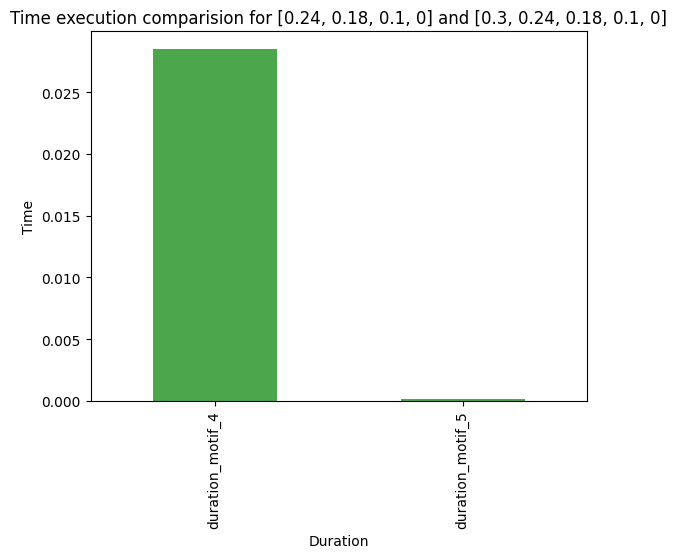

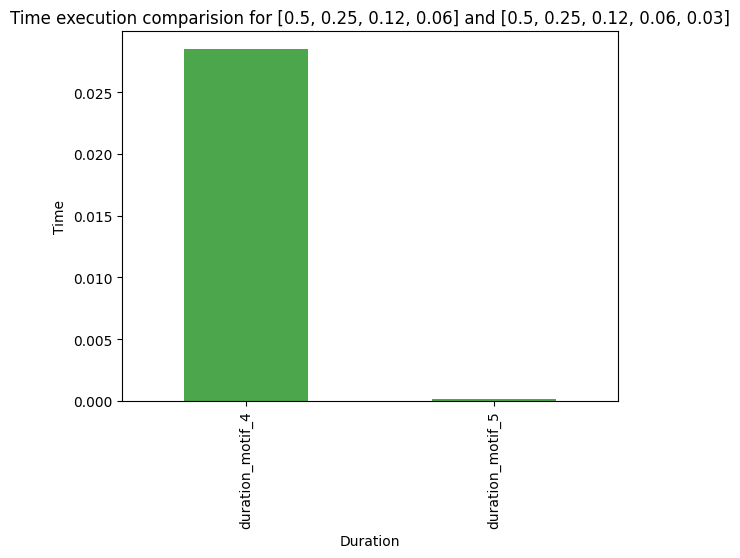

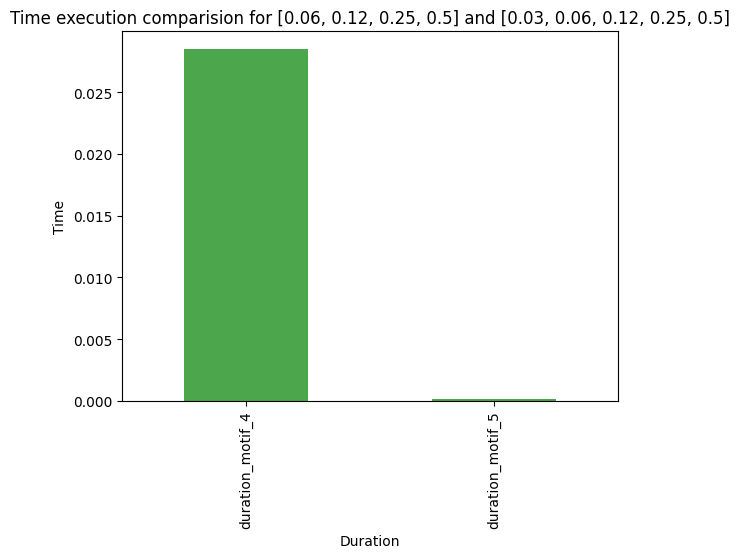

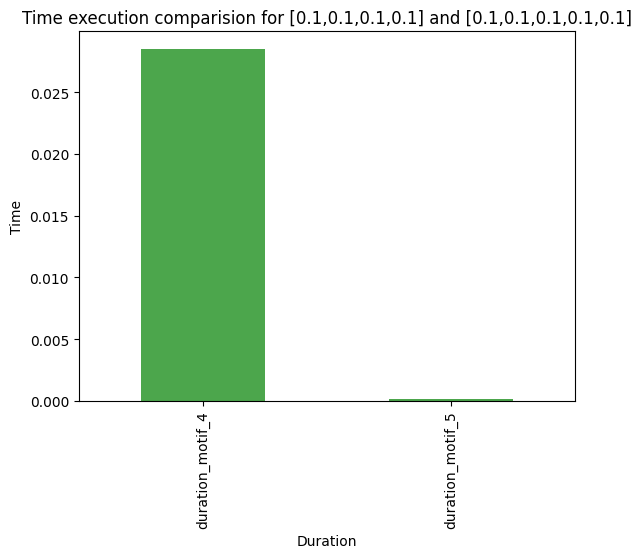

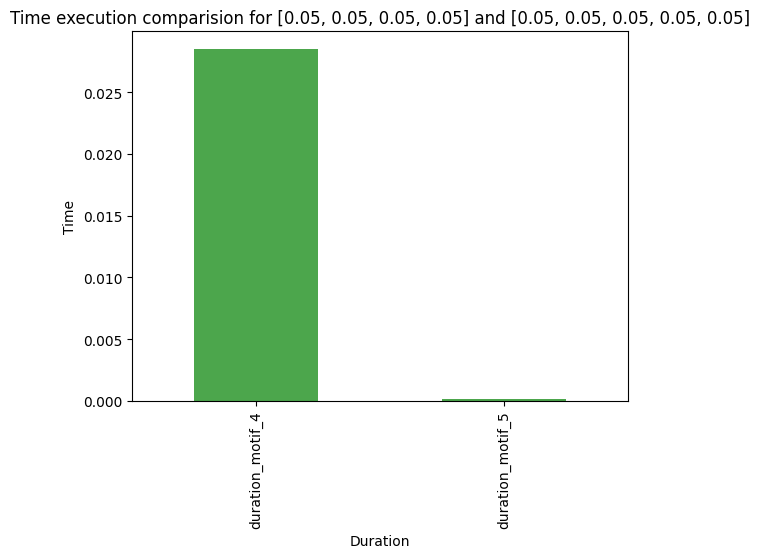

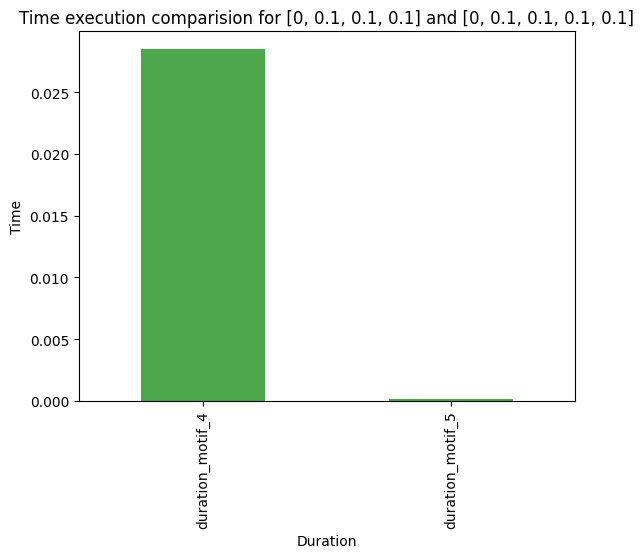

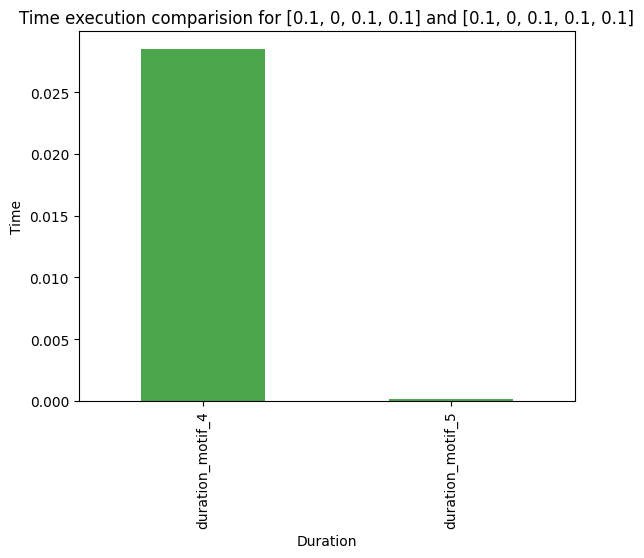

In [249]:
for i in range(0, num_tests):
    plot_ratio_bars(df_real.loc[0,['duration_motif_4', 'duration_motif_5']], df_app.loc[0,['duration_motif_4', 'duration_motif_5']], title=f"Time execution comparision for {df_app.loc[i,'array_p_4']} and {df_app.loc[i,'array_p_5']}", xlabel='Duration', ylabel='Time')

In [250]:
df_count_motifs_app.head()

,motif_4_4,motif_4_6,motif_4_7,motif_4_8,motif_4_9,motif_4_10,motif_5_11,motif_5_13,motif_5_14,motif_5_15,...,motif_5_29,motif_5_30,motif_5_31,motif_5_32,motif_5_33,duration_motif_3,duration_motif_4,duration_motif_5,array_p_4,array_p_5
0,35922681,1263808,599714,421660,216953,6652,22864562,5284310,1450355,774451,...,6838,12107,1940,2187,679,3.840622,22.755012,19.888355,"[0.3, 0.3, 0.3, 0.3]","[0.3, 0.3, 0.3, 0.3, 0.3]"
1,105257737,3981981,1891124,1359392,767444,23206,57127007,14774781,3885410,2474732,...,26919,24116,12503,5076,1222,3.839290,66.442606,51.682878,"[0.05, 0.1, 0.15, 0.2]","[0.05, 0.1, 0.15, 0.2, 0.25]"
2,121324306,5057671,2356363,1645387,1018479,30025,132970271,31580310,5775789,5356198,...,43058,40376,9873,6699,1733,3.855057,76.610547,114.020352,"[0.2, 0.15, 0.1, 0.05]","[0.25, 0.2, 0.15, 0.1, 0.05]"
3,94056751,3433553,1619975,1178766,685724,19326,46372336,12471132,2918632,2031340,...,19990,20501,4339,3374,962,3.843420,59.522660,42.544039,"[0, 0.1, 0.18, 0.24]","[0, 0.1, 0.18, 0.24, 0.3]"
4,118571159,4909013,2293941,1640987,923150,31476,124893308,25042376,7368979,3967233,...,73651,57032,9785,9296,2385,3.845361,72.349544,100.520025,"[0.24, 0.18, 0.1, 0]","[0.3, 0.24, 0.18, 0.1, 0]"


In [251]:
df_count_motifs_app.iloc[:, 0:6].sum(axis=1)

0      38431468
1     113280884
2     131432231
3     100994095
4     128369726
5      69274579
6      46822480
7     147284468
8     219122550
9     163176436
10    162011964
dtype: int64

In [252]:
df_count_motifs_real.iloc[0,0:6].sum(axis=0)

1301272047

In [253]:
df_ratio_agg_motif_4 = pd.DataFrame()
df_ratio_agg_motif_4['p_array'] = df_count_motifs_app['array_p_4']
df_ratio_agg_motif_4['ratio_motif_4'] = df_count_motifs_app.iloc[:, 0:6].sum(axis=1) / df_count_motifs_real.iloc[0,0:6].sum(axis=0)
df_ratio_agg_motif_4['duration'] = df_count_motifs_app['duration_motif_4']
df_ratio_agg_motif_4

,p_array,ratio_motif_4,duration
0,"[0.3, 0.3, 0.3, 0.3]",0.029534,22.755012
1,"[0.05, 0.1, 0.15, 0.2]",0.087054,66.442606
2,"[0.2, 0.15, 0.1, 0.05]",0.101003,76.610547
3,"[0, 0.1, 0.18, 0.24]",0.077612,59.522660
4,"[0.24, 0.18, 0.1, 0]",0.098649,72.349544
5,"[0.5, 0.25, 0.12, 0.06]",0.053236,40.385519
6,"[0.06, 0.12, 0.25, 0.5]",0.035982,28.388449
7,"[0.1,0.1,0.1,0.1]",0.113185,86.295634
8,"[0.05, 0.05, 0.05, 0.05]",0.168391,127.561494
9,"[0, 0.1, 0.1, 0.1]",0.125398,95.904094


In [254]:
df_ratio_agg_motif_5 = pd.DataFrame()
df_ratio_agg_motif_5['p_array'] = df_count_motifs_app['array_p_5']
df_ratio_agg_motif_5['ratio_motif_5'] = df_count_motifs_app.iloc[:, 6:27].sum(axis=1) / df_count_motifs_real.iloc[0, 6:27].sum(axis=0)
df_ratio_agg_motif_5['duration'] = df_count_motifs_app['duration_motif_5']
df_ratio_agg_motif_5

,p_array,ratio_motif_5,duration
0,"[0.3, 0.3, 0.3, 0.3, 0.3]",0.000167,19.888355
1,"[0.05, 0.1, 0.15, 0.2, 0.25]",0.000430,51.682878
2,"[0.25, 0.2, 0.15, 0.1, 0.05]",0.000963,114.020352
3,"[0, 0.1, 0.18, 0.24, 0.3]",0.000350,42.544039
4,"[0.3, 0.24, 0.18, 0.1, 0]",0.000887,100.520025
5,"[0.5, 0.25, 0.12, 0.06, 0.03]",0.001019,118.976923
6,"[0.03, 0.06, 0.12, 0.25, 0.5]",0.000232,28.720295
7,"[0.1,0.1,0.1,0.1,0.1]",0.001079,128.851249
8,"[0.05, 0.05, 0.05, 0.05, 0.05]",0.002597,305.311508
9,"[0, 0.1, 0.1, 0.1, 0.1]",0.001221,146.594979


In [255]:
df_ratio = df_count_motifs_app.iloc[:,2:27]/df_count_motifs_real.iloc[0,2:27]
df_ratio['duration_motif_4'] = df_count_motifs_app['duration_motif_4']
df_ratio['duration_motif_5'] = df_count_motifs_app['duration_motif_5']
df_ratio['array_p_4'] = df_count_motifs_app['array_p_4']
df_ratio['array_p_5'] = df_count_motifs_app['array_p_5']

In [256]:
df_ratio_motif_4 = df_ratio.iloc[:,[-2, 0, 1, 2, 3, -4]]
df_ratio_motif_4

,array_p_4,motif_4_7,motif_4_8,motif_4_9,motif_4_10,duration_motif_4
0,"[0.3, 0.3, 0.3, 0.3]",0.024812,0.012595,0.009811,0.016509,22.755012
1,"[0.05, 0.1, 0.15, 0.2]",0.078241,0.040606,0.034705,0.057592,66.442606
2,"[0.2, 0.15, 0.1, 0.05]",0.09749,0.049149,0.046058,0.074515,76.610547
3,"[0, 0.1, 0.18, 0.24]",0.067023,0.035211,0.03101,0.047963,59.522660
4,"[0.24, 0.18, 0.1, 0]",0.094907,0.049018,0.041747,0.078116,72.349544
5,"[0.5, 0.25, 0.12, 0.06]",0.051541,0.025848,0.024944,0.041111,40.385519
6,"[0.06, 0.12, 0.25, 0.5]",0.030711,0.015789,0.011916,0.019723,28.388449
7,"[0.1,0.1,0.1,0.1]",0.110705,0.053634,0.045713,0.08001,86.295634
8,"[0.05, 0.05, 0.05, 0.05]",0.17404,0.092137,0.075636,0.144685,127.561494
9,"[0, 0.1, 0.1, 0.1]",0.119895,0.062343,0.050314,0.093409,95.904094


In [257]:
df_ratio_motif_5 = df_ratio.iloc[:,[-1] + [i for i in range(4,25)] +  [-3]]
df_ratio_motif_5

,array_p_5,motif_5_11,motif_5_13,motif_5_14,motif_5_15,motif_5_16,motif_5_17,motif_5_18,motif_5_20,motif_5_21,...,motif_5_25,motif_5_26,motif_5_27,motif_5_28,motif_5_29,motif_5_30,motif_5_31,motif_5_32,motif_5_33,duration_motif_5
0,"[0.3, 0.3, 0.3, 0.3, 0.3]",0.000135,0.001388,0.000322,0.001285,0.000564,0.000218,0.000138,0.001913,0.00069,...,0.001025,0.0,0.000434,0.000629,0.000033,0.00022,0.000027,0.000059,0.00115,19.888355
1,"[0.05, 0.1, 0.15, 0.2, 0.25]",0.000338,0.00388,0.000863,0.004106,0.001647,0.000455,0.000554,0.005112,0.001805,...,0.002541,0.000395,0.001154,0.002537,0.000128,0.000438,0.000173,0.000137,0.00207,51.682878
2,"[0.25, 0.2, 0.15, 0.1, 0.05]",0.000788,0.008293,0.001283,0.008887,0.003599,0.001194,0.000702,0.009139,0.003685,...,0.003716,0.003712,0.002518,0.003291,0.000205,0.000733,0.000136,0.000181,0.002935,114.020352
3,"[0, 0.1, 0.18, 0.24, 0.3]",0.000275,0.003275,0.000648,0.00337,0.001311,0.000419,0.000362,0.004104,0.001299,...,0.001969,0.000513,0.000939,0.002361,0.000095,0.000372,0.00006,0.000091,0.001629,42.544039
4,"[0.3, 0.24, 0.18, 0.1, 0]",0.00074,0.006576,0.001637,0.006582,0.003115,0.001119,0.000591,0.008394,0.003803,...,0.004783,0.000948,0.002571,0.003494,0.000351,0.001035,0.000135,0.000251,0.004039,100.520025
5,"[0.5, 0.25, 0.12, 0.06, 0.03]",0.000877,0.007321,0.001168,0.007702,0.004024,0.001064,0.001189,0.008464,0.003955,...,0.003369,0.001422,0.002075,0.00751,0.000261,0.000854,0.000211,0.000236,0.002581,118.976923
6,"[0.03, 0.06, 0.12, 0.25, 0.5]",0.000183,0.002072,0.000459,0.002235,0.000846,0.000279,0.000281,0.002974,0.000921,...,0.001419,0.000355,0.000593,0.001248,0.00008,0.000271,0.000037,0.000066,0.001048,28.720295
7,"[0.1,0.1,0.1,0.1,0.1]",0.000862,0.009586,0.001752,0.010442,0.004631,0.001323,0.001134,0.011764,0.004551,...,0.005472,0.001974,0.002825,0.005855,0.000346,0.001181,0.000446,0.000331,0.00427,128.851249
8,"[0.05, 0.05, 0.05, 0.05, 0.05]",0.002187,0.020018,0.003718,0.021402,0.010094,0.003023,0.001717,0.022706,0.009914,...,0.009842,0.007148,0.005532,0.007535,0.000739,0.002432,0.000331,0.000524,0.008558,305.311508
9,"[0, 0.1, 0.1, 0.1, 0.1]",0.000983,0.010613,0.002032,0.01141,0.004955,0.001431,0.001136,0.012899,0.004995,...,0.005831,0.002883,0.002689,0.005423,0.000428,0.001348,0.000612,0.000374,0.00484,146.594979
